In [78]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.insert(0, '../python')
from measurements import *

plotter = Plotter()

from fitv2 import *


import h5py



#processedDataDir = "../data/processedv4/"


#This is the path to were you saved the processed correlators.
processedDataDir = "../processed/"


gdir = '../gnuplot_data/'

#%load_ext gnuplot_kernel


dt=0.72
chi0 = 5.0

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Below you need to put the name of the data file you   want to analyze. In your case, you don't need to have the original .h5 locally, but still need to specify the name here (the class reconstruct the correct name of the other files from there). 

So say you have locally zminus2_N080_m-0499128_h003000_c00500_OtOttp_Akk7.txt. Below you need to put
zminus2_N080_m-0499128_h003000_c00500.h5 .

The factor multiplying dt is the correction coming from the ideal step accept-reject, you need to change it accordingly, the numbers are in the paper. A clean way to do it would to store them in a dictionnary or array I guess.

In [79]:
data = ConfResults(fn="../data/zcritical_N080_m-0481100_h006000_c00500.h5",thTime=1000,dt=dt*0.9398, data_format="new", processedDir=processedDataDir, plotDir=gdir)

This is how you load the data. "OtOttp" means real time correlator, "A" mean axial, k=0. Finite k=4 is labelled by "Akk4" and so on. Below I loop over k=1 to 10 and load all of the 10 ks.

This syntax is handy: "Akk{}".format(k)

"This is a string {} and blabla {} blabla {}".format(a,b,c)

replace {} {} {} by a,b,c and a,b,c  can be whatever object than can be converted to a string.

In [80]:
data.load("OtOttp","A", direc=processedDataDir)
for k in range(1,10):
    data.load("OtOttp","Akk{}".format(k), direc=processedDataDir)
    # You need this line only if you want to ompute the fourier transform, see below.
    #data.load("OtOttp_blocks","Akk{}".format(k), direc=processedDataDir)
    

There is this plotter object that is handy to do the plots, you tell which obs and which channel and t does the plot.

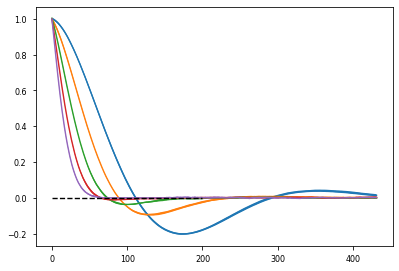

In [81]:
for k in range(1,6):
    plotter.plot(data,"OtOttp","Akk{}".format(k),tMax = 600, yfact = 1.0 / 5.0)
#plotter.plot(dataminus,"OtOttp","dsigma",tMax = 2200, yfact = 1.0 / np.real(dataminus.OtOttp['dsigma'].mean[0]))
plt.plot([0,200],[0,0],'--k')

Below is only an example to compute the Fourier transform, but let's not worry about it.

In [82]:
#for k in range(1,10):
#    data.computeStatisticalCor("Akk{}".format(k),0.1,errFunc=lambda x: (np.mean(x, axis = 0), np.std(np.real(x), axis = 0) + 1j*np.std(np.imag(x), axis = 0)), filterFunc=lambda x : np.exp(-x / 1000.0))

In [83]:
#plotter.plot(data,"OtOttpFourier","Akk3")

This is how I envision the fit to work. For every k, create a new Fitter. It takes  as an argument k, even if it is not used so far. 

In [84]:
fitter= dict()

fitter["Akk3"] = Fitter(data, chi0 = chi0, chiperp = 1, L=80, k = 3)

As explained in the class, you specify again here the obs and channel/fit type. Then you specify an appropriate number of initial conditions for the fit.

In [85]:
fitter["Akk3"].setParValues("OtOttp", "Akk3", [0.005,0.013,-0.1])

Do the fit by calling fit. min/maxInd and prune allow you to restrict the data range and prune them in case you need it.

In [86]:
fitter["Akk3"].fit("OtOttp", "Akk3", minInd=0,maxInd=1600, prune=1)

[5.01526673+0.j         4.96371723-0.00036067j 4.90885347+0.00153485j ...
 0.00787547-0.00866078j 0.0086475 -0.00854573j 0.00879806-0.0087287j ]


(153.2001015481577,
 0.1106137917315218,
 1385,
 <ValueView a=0.061187803116820184 b=0.02848166018162377 c=-0.5707080927958431>)

In [87]:
fitter["Akk3"].averagechi2reduce

{'OtOttp': {'Akk3': 0.1106137917315218},
 'OtOttpFourier': {},
 'propagatorF': {},
 'propagator': {}}

In [88]:
fitter["Akk3"].par

{'OtOttp': {'Akk3': [0.061187803116820184,
   0.02848166018162377,
   -0.5707080927958431]},
 'OtOttpFourier': {'A': array([0., 0.]),
  'phi': array([0., 0.]),
  'dphi': array([0., 0.]),
  'Aphi': array([0., 0.])},
 'propagatorF': {'phi': array([0., 0.]), 'dsigma': array([0., 0.])},
 'propagator': {'phi': array([0., 0.])}}

In [89]:
fitter["Akk3"].parErr

{'OtOttp': {'Akk3': array([0.00029288, 0.00011078, 0.00788523])},
 'OtOttpFourier': {},
 'propagatorF': {},
 'propagator': {}}

[0.061187803116820184, 0.02848166018162377, -0.5707080927958431]


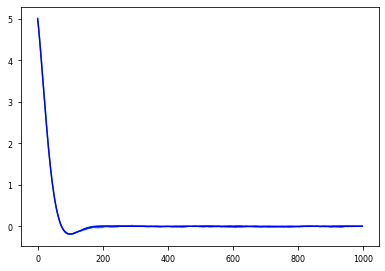

In [90]:
plotter.plot(data,"OtOttp","Akk3",tMax = 20000, yfact = 1.0 )
fitter["Akk3"].plot("OtOttp", "Akk3")